In [2]:
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# FaceMesh index
# https://github.com/google/mediapipe/blob/master/mediapipe/python/solutions/face_mesh_connections.py

In [3]:
def imgshow(frame):
  plt.figure(figsize = (20,20))
  plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [29]:
# Src Drawing utils
# https://github.com/google/mediapipe/blob/cf101e62a9d49a51be76836b2b8e5ba5c06b5da0/mediapipe/python/solutions/drawing_utils.py#L50

# Face Index map
# https://github.com/google/mediapipe/blob/a908d668c730da128dfa8d9f6bd25d519d006692/mediapipe/modules/face_geometry/data/canonical_face_model_uv_visualization.png

def process_landmark(frame, dispay=False):
  mp_face_mesh = mp.solutions.face_mesh
  with mp_face_mesh.FaceMesh(
      static_image_mode=False,
      max_num_faces=1,
      refine_landmarks=True,
      min_detection_confidence=0.5) as face_mesh:
    image = frame
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      return None, None

    if not dispay:
      return results.multi_face_landmarks[0], None

    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          # connections= [(159, 145), (386, 374)],
          landmark_drawing_spec=drawing_spec
          )
    return results.multi_face_landmarks[0], annotated_image

def landmark_extract(landmark):
  # [(x,y,z),(x2,y2,z2)] -> [x,y,z,x2,y2,z2]
  flattern_data = np.array(list(map(lambda x: [x.x, x.y, x.z], landmark)))
  flattern_data = flattern_data.flatten()
  return flattern_data

In [30]:
vid = cv2.VideoCapture(0)
SEQUENCE_FRAME = 32

# store 32 frames
acc_data = []
while(True):
    # Capture the video frame
    # by frame
    ret, frame = vid.read()

    (res,annotated_image) = process_landmark(frame, True)
    
    if annotated_image is not None:
    # Display the resulting frame
        cv2.imshow('frame', annotated_image)
        acc_data.append(landmark_extract(res.landmark))
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()

# Destroy all the windows
cv2.destroyAllWindows()

# macos stuck
cv2.waitKey(1)

-1

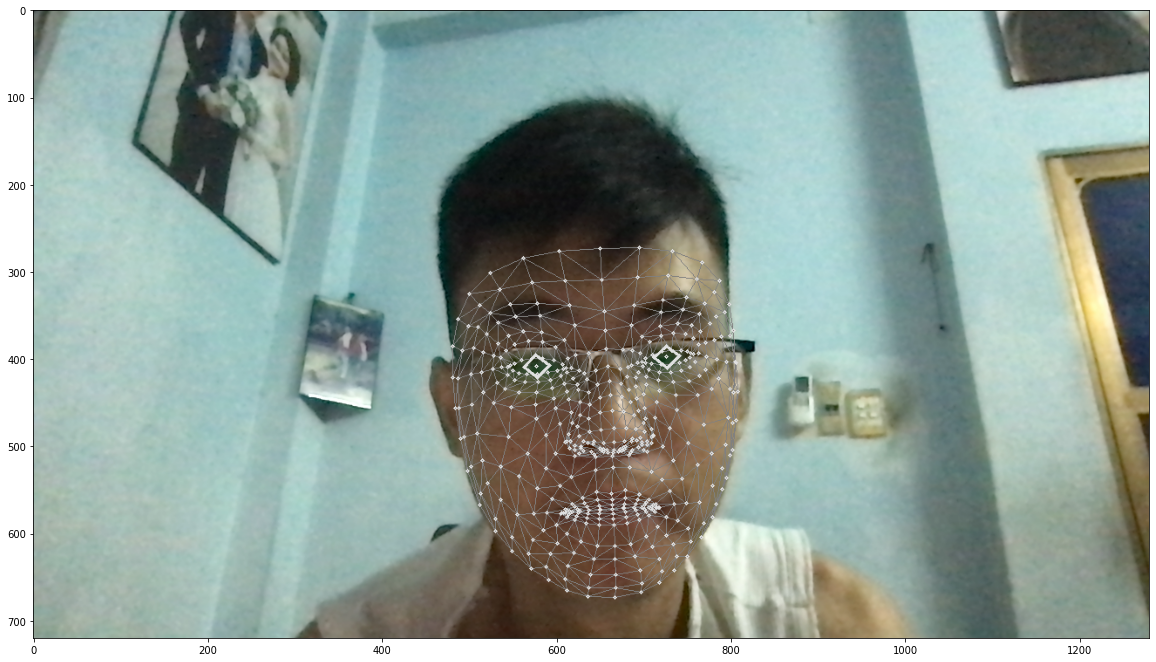

In [24]:
(res,annotated_image) = process_landmark(frame, True)
imgshow(annotated_image)

In [28]:
data = landmark_extract(res.landmark)
print(data.shape)

(1434,)
